# Logistic Regression Example

### 生成数据集
#### '<font color="blue">+</font>' 从高斯分布采样 (X, Y) ~ N(3, 6, 1, 1, 0).<br>
#### '<font color="green">o</font>' 从高斯分布采样  (X, Y) ~ N(6, 3, 1, 1, 0)<br>

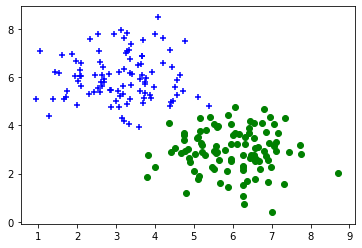

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

dot_num = 100
x_p = np.random.normal(3., 1, dot_num)
y_p = np.random.normal(6., 1, dot_num)
y = np.ones(dot_num)
C1 = np.array([x_p, y_p, y]).T

x_n = np.random.normal(6., 1, dot_num)
y_n = np.random.normal(3., 1, dot_num)
y = np.zeros(dot_num)
C2 = np.array([x_n, y_n, y]).T

plt.scatter(C1[:, 0], C1[:, 1], c='b', marker='+')
plt.scatter(C2[:, 0], C2[:, 1], c='g', marker='o')

data_set = np.concatenate((C1, C2), axis=0)
np.random.shuffle(data_set)

x, y = torch.from_numpy(data_set[:, 0:2]).float(), torch.from_numpy(data_set[:, 2]).float().view(-1, 1)

## 建立模型
建立模型类，定义loss函数，定义一步梯度下降过程函数

In [2]:
epsilon = 1e-12
class LogisticRegression(nn.Module):
    def __init__(self):
        # registering learnable parameters
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(2, 1)
        
    def forward(self, x):
        scores = self.linear(x)
        return scores


def compute_loss(scores, gt):
    '''
    manual implementation of logistic regression loss
    '''
    #######################################################
    # TODO：手动实现logistic regression loss              #
    #######################################################
    
    pass
    
    #######################################################

    return loss

criterion = nn.BCEWithLogitsLoss()

In [3]:
pred = torch.rand(4, 3)
tar = torch.full([4, 3], 0.4)
raw = compute_loss(pred, tar)
bce = criterion(pred, tar)
print("difference:", raw.item()-bce.item())

difference: 5.960464477539063e-08


### 实例化一个模型，进行训练

In [4]:
import torch.optim as optim

model = LogisticRegression()
optimizer = optim.SGD(model.parameters(), lr=0.01)

animation_fram = []
N = x.size()[0]
for i in range(200):
    optimizer.zero_grad()
    scores = model(x)
    loss = compute_loss(scores, y)
    loss.backward()
    optimizer.step()
    
    pred = (scores>0).int()
    acc = (pred==y.int()).sum().item()/N
    w, b = model.linear.weight.data.numpy(), model.linear.bias.data.numpy()
    
    animation_fram.append((w[0,0], w[0,1], b[0], loss.item()))
    if i%20 == 0:
        print('loss: %.4f\t accuracy: %.4f'%(loss.item(), acc))
        #print(torch.cat([(scores>0).float(), y], dim=1))

loss: 1.5366	 accuracy: 0.4450
loss: 0.9030	 accuracy: 0.1000
loss: 0.6432	 accuracy: 0.9900
loss: 0.4924	 accuracy: 0.9950
loss: 0.3986	 accuracy: 0.9950
loss: 0.3365	 accuracy: 0.9950
loss: 0.2927	 accuracy: 0.9950
loss: 0.2604	 accuracy: 0.9950
loss: 0.2356	 accuracy: 0.9950
loss: 0.2159	 accuracy: 0.9950


## 结果展示
如报错`RuntimeError: No MovieWriters(ffmpeg) available`: [ffmpeg安装](https://blog.csdn.net/qq_39516859/article/details/81843419)

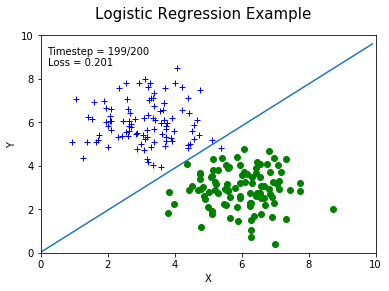

In [5]:

f, ax = plt.subplots(figsize=(6,4))
f.suptitle('Logistic Regression Example', fontsize=15)
plt.ylabel('Y')
plt.xlabel('X')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

line_d, = ax.plot([], [], label='fit_line')
C1_dots, = ax.plot([], [], '+', c='b', label='actual_dots')
C2_dots, = ax.plot([], [], 'o', c='g' ,label='actual_dots')


frame_text = ax.text(0.02, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes)
# ax.legend()

def init():
    line_d.set_data([],[])
    C1_dots.set_data([],[])
    C2_dots.set_data([],[])
    return (line_d,) + (C1_dots,) + (C2_dots,)

def animate(i):
    xx = np.arange(10, step=0.1)
    a = animation_fram[i][0]
    b = animation_fram[i][1]
    c = animation_fram[i][2]
    yy = a/-b * xx +c/-b
    line_d.set_data(xx, yy)
        
    C1_dots.set_data(C1[:, 0], C1[:, 1])
    C2_dots.set_data(C2[:, 0], C2[:, 1])
    
    frame_text.set_text('Timestep = %.1d/%.1d\nLoss = %.3f' % (i, len(animation_fram), animation_fram[i][3]))
    
    return (line_d,) + (C1_dots,) + (C2_dots,)

anim = animation.FuncAnimation(f, animate, init_func=init,
                               frames=len(animation_fram), interval=30, blit=True)

HTML(anim.to_html5_video())



## 答案
```python
sigmoid = 1/(1+torch.exp(-scores))
ln = -gt*torch.log(sigmoid) - (1-gt)*torch.log(1-sigmoid)
loss = torch.mean(ln)
```